## Import the necessary libraries 

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt  
import seaborn as sns

from scipy import stats
from scipy.stats import norm, skew 

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Read the train set and test set

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
print('Size of the sets')
train.shape, test.shape

Size of the sets


((1460, 81), (1459, 80))

In [6]:
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

### Removing outliers

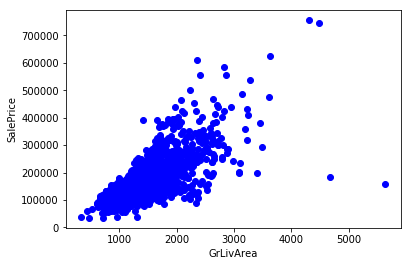

In [7]:
plt.scatter(train.GrLivArea, train.SalePrice, c = 'blue')
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.show()

In [8]:
train[(train.GrLivArea > 4000) & (train.SalePrice < 300000)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [9]:
#Deleting outliers
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

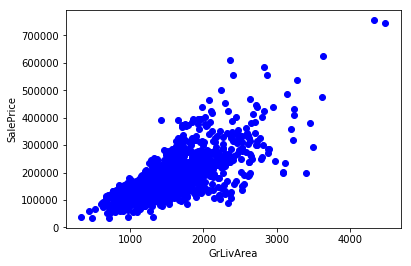

In [10]:
plt.scatter(train.GrLivArea, train.SalePrice, c = "blue")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.show()

In [11]:
#Save the 'Id' column
train_ID = train['Id']
test_ID = test['Id']

#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

Plot the distribution of sale prices

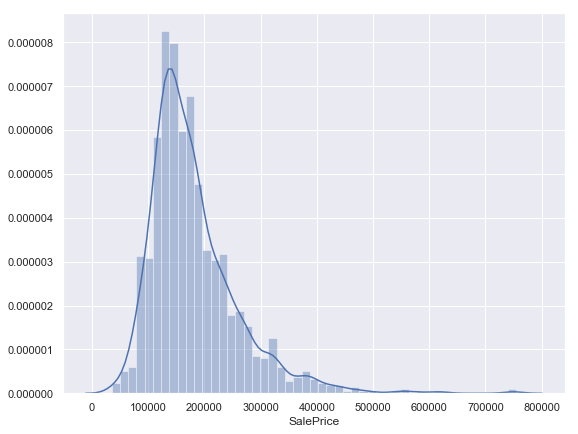

In [12]:
sns.set(rc={'figure.figsize':(9,7)})
sns.distplot(train.SalePrice)

In [13]:
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

Skewness: 1.881296
Kurtosis: 6.523067


As we can see, the data of Sale Price is right-skewed. So we take the log variable to see

In [14]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train["SalePrice"] = np.log1p(train["SalePrice"])

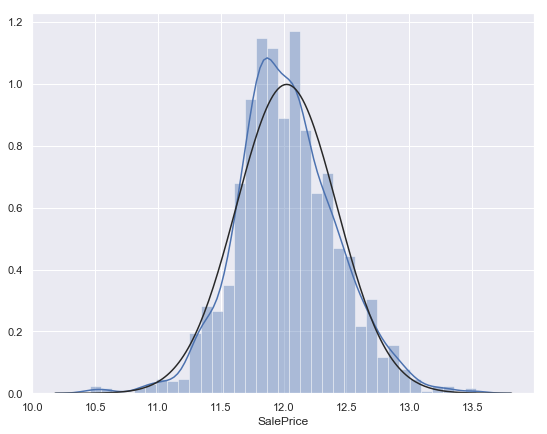

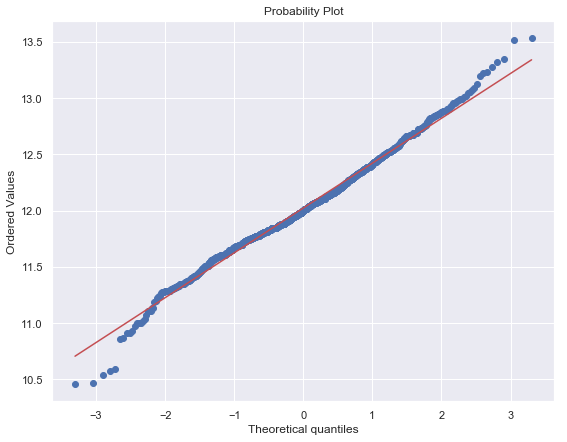

In [15]:
sns.distplot(train["SalePrice"] , fit=norm)
fig = plt.figure()
res = stats.probplot(train["SalePrice"], plot=plt)

## Data Cleaning and Preprocessing

In [16]:
# Metadata of the dataset
object_col_names = train.select_dtypes(include=[np.object]).columns.tolist()
int_col_names = train.select_dtypes(include=[np.int64]).columns.tolist()
float_col_names = train.select_dtypes(include=[np.float64]).columns.tolist()
target_var = 'SalesPrice'

num_col_names = int_col_names + float_col_names
total_col_names = object_col_names + int_col_names + float_col_names

if len(total_col_names) == train.shape[1]:
    print('Number of Features count matching. Train Dataset Features: ', train.shape[1], ' Features Count: ', len(total_col_names))
else:
    print('Number of Features count not matching. Train Dataset Features: ', train.shape[1], ' Features Count: ', len(total_col_names))

print('\nTotal number of object features: ', len(object_col_names))
print(object_col_names)

print('\nTotal number of integer features: ', len(int_col_names))
print(int_col_names)

print('\nTotal number of float features: ', len(float_col_names))
print(float_col_names)

Number of Features count matching. Train Dataset Features:  80  Features Count:  80

Total number of object features:  43
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

Total number of integer features:  33
['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomA

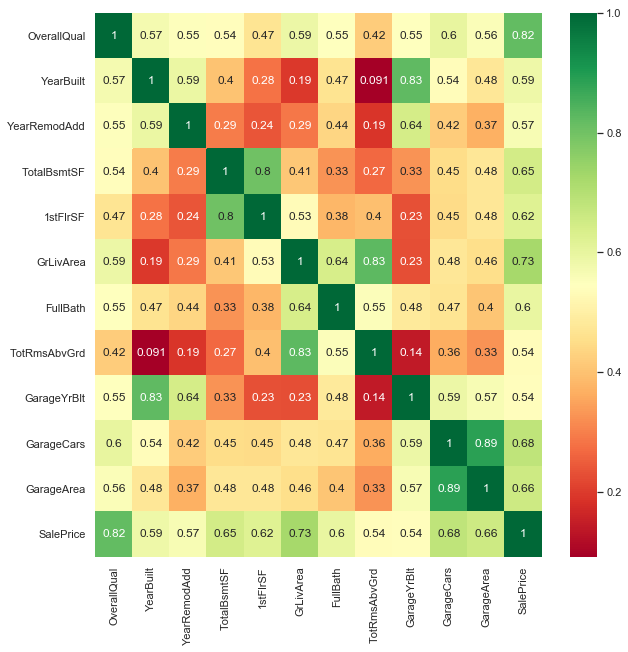

In [17]:
# most correlated features with SalePrice
plt.figure(figsize=(10,10))
corrmat = train.corr()
top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>0.5]
sns.heatmap(train[top_corr_features].corr(),annot=True,cmap="RdYlGn")

### Concatenate the train set and the test set

In [18]:
y_train = train.SalePrice.values
mydata = pd.concat((train, test)).reset_index(drop=True)
mydata.drop(['SalePrice'], axis=1, inplace=True)
print("mydata size is : {}".format(mydata.shape))

mydata size is : (2917, 79)


### Missing data

In [19]:
mydata_na = mydata.isnull().sum()
mydata_na = mydata_na.drop(mydata_na[mydata_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Value' :mydata_na})
missing_data.head()

,Missing Value
PoolQC,2908
MiscFeature,2812
Alley,2719
Fence,2346
FireplaceQu,1420


In [20]:
missing_data.index.tolist()

['PoolQC',
 'MiscFeature',
 'Alley',
 'Fence',
 'FireplaceQu',
 'LotFrontage',
 'GarageQual',
 'GarageCond',
 'GarageFinish',
 'GarageYrBlt',
 'GarageType',
 'BsmtExposure',
 'BsmtCond',
 'BsmtQual',
 'BsmtFinType2',
 'BsmtFinType1',
 'MasVnrType',
 'MasVnrArea',
 'MSZoning',
 'BsmtFullBath',
 'BsmtHalfBath',
 'Utilities',
 'Functional',
 'Electrical',
 'BsmtUnfSF',
 'Exterior1st',
 'Exterior2nd',
 'TotalBsmtSF',
 'GarageArea',
 'GarageCars',
 'BsmtFinSF2',
 'BsmtFinSF1',
 'KitchenQual',
 'SaleType']

### Filling the NA values

We can observe that some houses have BsmtCond but not BsmtQual, so I fill the NAs of those houses with the TA which means typical values 

In [21]:
set1 =  set(mydata.index[mydata['BsmtCond'].isnull()].tolist())
set2 =  set(mydata.index[mydata['BsmtQual'].isnull()].tolist())
idx = set1.symmetric_difference(set2)

In [22]:
for i in idx:
    x = mydata.iloc[i]
    print(x['BsmtCond'])
    print(x['BsmtQual'])

nan
TA
Fa
nan
TA
nan
nan
TA
nan
Gd


In [23]:
for i in idx:
    if type(mydata.iloc[i]['BsmtCond']) == type(np.nan):
        mydata['BsmtCond'][i] = 'TA' # typical value
    if type(mydata.iloc[i]['BsmtQual']) == type(np.nan):
        mydata['BsmtQual'][i] = 'TA' # typical value

Fill none columns

In [24]:
none_col = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'MasVnrType', 
            'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'KitchenQual',
            'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
for col in none_col:
    mydata[none_col] = mydata[none_col].fillna('None')

Fill 0-columns

In [25]:
zero_col = ['GarageArea', 'GarageCars', 'MasVnrArea', 'BsmtFullBath', 'BsmtHalfBath',
            'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF','GarageYrBlt']
for col in zero_col:
    mydata[col] = mydata[col].fillna(0)

Fill mode columns

In [26]:
mode_col = ['MSZoning', 'Exterior1st', 'Exterior2nd']
for col in mode_col:
    mydata[col] = mydata[col].fillna(mydata[col].mode()[0])

Fill LotFrontage with median of the neighborhood

In [27]:
mydata["LotFrontage"] = mydata.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

Fill the rest with the mode

In [28]:
mydata['Functional'] = mydata['Functional'].fillna('Typ')
mydata['Utilities'] = mydata['Utilities'].fillna('AllPub')
mydata['Electrical'] = mydata['Electrical'].fillna('SBrkr')
mydata['SaleType'] = mydata['SaleType'].fillna('Oth')

Check if there is any missing value left

In [29]:
mydata_na = mydata.isnull().sum()
mydata_na = mydata_na.drop(mydata_na[mydata_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Value' :mydata_na})
missing_data.head()

,Missing Value


Utilities : Since this is a categorical data and most of the data are of same category, Its not gonna effect on model. So we choose to drop it.

In [30]:
mydata = mydata.drop(['Utilities'], axis=1)
print('Size of dataset after removing Utilities feature: {} rows, {} columns'.format(mydata.shape[0], mydata.shape[1]))

Size of dataset after removing Utilities feature: 2917 rows, 78 columns


### Convert some of the numerical values to categorical in order for them to not affect the rating

In [31]:
#MSSubClass
mydata['MSSubClass'] = mydata['MSSubClass'].apply(str)

#Year and month sold are transformed into categorical features too.
mydata['YrSold'] = mydata['YrSold'].astype(str)
mydata['MoSold'] = mydata['MoSold'].astype(str)

#Changing OverallCond into a categorical variable
mydata['OverallCond'] = mydata['OverallCond'].astype(str)

## Label encoding 

By now, we can’t have text in our data if we’re going to run any kind of model on it. So before we can run a model, we need to make this data ready for the models.

And to convert this kind of categorical text data into model-understandable numerical data, we use the Label Encoder.

Suppose, we have a feature State which has 3 category i.e India , France, China . So, Label Encoder will categorize them as 0, 1, 2.

In [32]:
from sklearn.preprocessing import LabelEncoder
cols = ['FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 'YrSold', 'MoSold',
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond'] 
# process columns, apply LabelEncoder to categorical features
for c in cols:
    label_enc = LabelEncoder() 
    label_enc.fit(list(mydata[c].values)) 
    mydata[c] = label_enc.transform(list(mydata[c].values))

In [33]:
# Adding total area feature 
mydata['TotalSF'] = mydata['TotalBsmtSF'] + mydata['1stFlrSF'] + mydata['2ndFlrSF'] #+ mydata["GarageArea"]

In [34]:
numeric_feats = mydata.dtypes[mydata.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = mydata[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,21.939672
PoolArea,17.688664
LotArea,13.109495
LowQualFinSF,12.084539
3SsnPorch,11.372080
LandSlope,4.973254
KitchenAbvGr,4.300550
BsmtFinSF2,4.144503
EnclosedPorch,4.002344
ScreenPorch,3.945101


In [35]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #mydata[feat] += 1
    mydata[feat] = boxcox1p(mydata[feat], lam)

There are 59 skewed numerical features to Box Cox transform


In [36]:
mydata = pd.get_dummies(mydata)
print(mydata.shape)

(2917, 220)


In [37]:
train = mydata[:train.shape[0]]
test = mydata[train.shape[0]:]

## Applying the models

In [38]:
# import all the necessary libraries
from sklearn.linear_model import ElasticNet, Lasso, BayesianRidge, LinearRegression, Ridge, SGDRegressor, HuberRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [39]:
#Validation function
n_folds = 5

def kfold_cv_rmsle(model, X, y):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X.values)
    rmsle = np.sqrt(-cross_val_score(model, X.values, y, scoring="neg_mean_squared_error", cv = kf))
    return(rmsle)

def kfold_cv_pred(model, X, y):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X.values)
    y_pred = cross_val_predict(model, X.values, y, cv=kf)

    return(y_pred)

Here we test a number of models to see which models to be chosen in my case

In [40]:
models = [Ridge(),make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1)),
          RandomForestRegressor(),GradientBoostingRegressor(),SVR(),LinearSVR(),
          make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=1)),
          make_pipeline(RobustScaler(), BayesianRidge()),KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5),
          ExtraTreesRegressor(),HuberRegressor(),xgb.XGBRegressor(),lgb.LGBMRegressor()]

In [41]:
names = ["Ridge", "Lasso", "RF", "GBR", "SVR", "LinSVR", "ENet","Bay","Ker","Extra","Huber","Xgb","LBG"]
for name, model in zip(names, models):
    score = kfold_cv_rmsle(model, train, y_train)
    print("{}: {:.6f}, {:.6f}".format(name,score.mean(),score.std()))

Ridge: 0.119299, 0.009838
Lasso: 0.111804, 0.007208
RF: 0.146956, 0.004584
GBR: 0.121826, 0.006515
SVR: 0.151206, 0.008315
LinSVR: 0.135578, 0.017556
ENet: 0.111821, 0.007253
Bay: 0.114394, 0.007663
Ker: 0.115313, 0.007399
Extra: 0.139124, 0.007760
Huber: 0.120992, 0.006269
Xgb: 0.123521, 0.004807
LBG: 0.127551, 0.005200


As such I decide to include those models that have scores lower than 0.13. However in the code below I will not use all declared models since some are actually making it worse

In [42]:
Rid = Ridge(alpha=1.0, fit_intercept=True, normalize=False, copy_X=True, 
            max_iter=None, tol=0.001, solver='auto', random_state=None)
Hub = HuberRegressor(epsilon=1.35, max_iter=100, alpha=0.0001, warm_start=False, fit_intercept=True, tol=1e-05)
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
Bay = BayesianRidge()
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

Testing with some of the models

In [43]:
HubMd = Hub.fit(train.values, y_train)
RidMd = Rid.fit(train.values, y_train)
BayMd = Bay.fit(train.values, y_train)
LassoMd = lasso.fit(train.values,y_train)
ENetMd = ENet.fit(train.values,y_train)
KRRMd = KRR.fit(train.values,y_train)
GBoostMd = GBoost.fit(train.values,y_train)

In [44]:
from sklearn.metrics import mean_squared_error

Hub_train_pred = HubMd.predict(train.values)
Rid_train_pred = RidMd.predict(train.values)
Bay_train_pred = BayMd.predict(train.values)
lasso_train_pred = LassoMd.predict(train.values)
ENet_train_pred = ENetMd.predict(train.values)
KRR_train_pred = KRRMd.predict(train.values)
GBoost_train_pred = GBoostMd.predict(train.values)

# checking the error on the train data
avg_train_pred = (Rid_train_pred+Bay_train_pred+ENet_train_pred+KRR_train_pred+GBoost_train_pred)/5

avg_rmsle = np.sqrt(mean_squared_error(y_train, avg_train_pred))
print("Average Model RMSLE score: {:.4f}".format(avg_rmsle))

avg_train_pred = np.expm1(avg_train_pred)
avg_train_pred

Average Model RMSLE score: 0.0823


array([207207.16802372, 183072.76337458, 218447.83864454, ...,
       261252.52719538, 139354.6249605 , 149383.86572724])

Checking the result with the average of the above models

In [45]:
Hub_test_pred = np.expm1(HubMd.predict(test.values))
Rid_test_pred = np.expm1(RidMd.predict(test.values))
Bay_test_pred = np.expm1(BayMd.predict(test.values))
lasso_test_pred = np.expm1(LassoMd.predict(test.values))
ENet_test_pred = np.expm1(ENetMd.predict(test.values))
KRR_test_pred = np.expm1(KRRMd.predict(test.values))
GBoost_test_pred = np.expm1(GBoostMd.predict(test.values))

In [46]:
myMd = (Rid_test_pred+Bay_test_pred+ENet_test_pred+KRR_test_pred+GBoost_test_pred)/5
myMd[:20]

array([120717.05569169, 163632.56856532, 182766.98913598, 194993.47467661,
       197558.09602518, 171385.27872672, 176007.56679672, 158872.98306706,
       185763.66465743, 120616.82139198, 192248.57002151,  96034.90979568,
        95773.22021011, 143944.2952651 , 108313.12163123, 373220.17196019,
       248891.53834487, 286232.73884928, 282206.93441581, 488827.86861315])

However this result doesn't give good score when I try, so we come up with new method

### Out-of-fold prediction

In [47]:
nfolds = 7 # set folds for out-of-fold prediction

def get_oof(model, x_train, y_train, x_test):
    oof_train = np.zeros((train.shape[0],))
    oof_test = np.zeros((test.shape[0],))
    oof_test_skf = np.empty((nfolds, test.shape[0]))
    
    kf = KFold(nfolds, shuffle=False, random_state=42).split(train.values)

    for i, (train_index, test_index) in enumerate(kf):
        x_tr = x_train[train_index]
        y_tr = y_train[train_index]
        x_te = x_train[test_index]

        model.fit(x_tr, y_tr)

        oof_train[test_index] = model.predict(x_te)
        oof_test_skf[i, :] = model.predict(x_test)

    oof_test[:] = oof_test_skf.mean(axis=0)
    return oof_train.reshape(-1, 1), oof_test.reshape(-1, 1)

#### Create our OOF train and test predictions. These base results will be used as new features

In [48]:
Hub_oof_train, Hub_oof_test = get_oof(Hub, train.values, y_train, test.values)
Rid_oof_train, Rid_oof_test = get_oof(Rid, train.values, y_train, test.values)
Bay_oof_train, Bay_oof_test = get_oof(Bay, train.values, y_train, test.values)
ENet_oof_train, ENet_oof_test = get_oof(ENet, train.values, y_train, test.values)
KRR_oof_train, KRR_oof_test = get_oof(KRR, train.values, y_train, test.values)
GB_oof_train, GB_oof_test = get_oof(GBoost, train.values, y_train, test.values)
XGB_oof_train, XGB_oof_test = get_oof(model_xgb, train.values, y_train, test.values)
lasso_oof_train, lasso_oof_test = get_oof(lasso, train.values, y_train, test.values)

In [49]:
base_predictions_train = pd.DataFrame( {'Kernel Ridge': KRR_oof_train.ravel(),
                                        'Bayesian Ridge': Bay_oof_train.ravel(),
                                        'Lasso': lasso_oof_train.ravel(),
                                        'Elastic Net': ENet_oof_train.ravel(),
                                        'XGBoost': XGB_oof_train.ravel(),
                                        'GBoost': GB_oof_train.ravel(),
                                        'Ridge': Rid_oof_train.ravel(),
                                        'Hub': Hub_oof_train.ravel(),
                                       } )
base_predictions_train.head()

,Kernel Ridge,Bayesian Ridge,Lasso,Elastic Net,XGBoost,GBoost,Ridge,Hub
0,12.249994,12.239910,12.249076,12.249433,12.229329,12.250889,12.243302,12.247548
1,12.127464,12.130517,12.112320,12.111935,12.091178,12.033287,12.148206,12.042386
2,12.284505,12.286611,12.293308,12.291794,12.257308,12.277446,12.282278,12.320558
3,12.042585,12.011264,12.037152,12.037643,12.096852,11.988820,12.001528,12.063424
4,12.561976,12.579902,12.596387,12.596141,12.591869,12.575695,12.591190,12.545200


In [50]:
x_train = np.concatenate((lasso_oof_train, Rid_oof_train, Bay_oof_train, KRR_oof_train, ENet_oof_train,
                          GB_oof_train, XGB_oof_train), axis=1)
x_test = np.concatenate((lasso_oof_test, Rid_oof_test, Bay_oof_test, KRR_oof_test, ENet_oof_test,
                         GB_oof_test, XGB_oof_test), axis=1)

Stacking the models with Kernel Ridge as the base

In [51]:
Stacked_Model = KRR.fit(x_train, y_train)

n_folds = 5
kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(x_train)
rmsle_score = np.sqrt(-cross_val_score(Stacked_Model, x_train, y_train, scoring="neg_mean_squared_error", cv = kf))
print("Stacked Lasso Model score: {:.4f} ({:.4f})\n".format(rmsle_score.mean(), rmsle_score.std()))

finalMd = Stacked_Model.predict(x_test)
finalMd = np.expm1(finalMd)
finalMd[:20]

Stacked Lasso Model score: 0.1081 (0.0065)



array([119492.32048684, 163866.12972583, 185296.82810424, 195876.54241214,
       192860.13308782, 173288.7371281 , 177311.51953781, 161885.5408862 ,
       185874.04091022, 121618.17906587, 195807.9795533 ,  94560.71682561,
        94779.29541244, 146598.95739087, 109889.51345351, 377928.1137781 ,
       249371.17956406, 283102.01629675, 282907.58514402, 489626.98407575])

However the result above alone is not good either. So I use the method as referenced here: https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard but by library's function not by our own function

In [52]:
from mlxtend.regressor import StackingRegressor

stregr = StackingRegressor(regressors=[KRR, GBoost, lasso, Hub, Bay, Rid], 
                           meta_regressor= KRR)

stregr.fit(train.values, y_train)
stregr_train_pred = stregr.predict(train.values)

stregr_rmsle = np.sqrt(mean_squared_error(y_train, stregr_train_pred))
print("Stacking Regressor Model RMSLE score: {:.4f}".format(avg_rmsle))

stregr_train_pred = np.expm1(stregr_train_pred)
stregr_train_pred

Stacking Regressor Model RMSLE score: 0.0823


array([207434.29148726, 182165.72310294, 215935.02682931, ...,
       268274.06055922, 140989.73933353, 150695.9146739 ])

In [53]:
stregr_test_pred = stregr.predict(test.values)
finalMd1 = np.expm1(stregr_test_pred)
finalMd1[:20]

array([125414.77530222, 166663.53005208, 178518.75271697, 192913.3584495 ,
       195135.9863109 , 176519.41509873, 171543.80451594, 165024.09996145,
       174935.91865386, 127123.6556509 , 198951.20304402,  94904.89425166,
        96715.36489649, 145575.18307354, 118911.08342507, 390741.55861326,
       264459.30259455, 288055.77382363, 279786.2730735 , 532341.81158169])

Test for the error to determine the weight

In [54]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [55]:
# stacked regressor
stregr.fit(train.values, y_train)
stacked_train_pred = stregr.predict(train.values)
stacked_pred = np.expm1(stregr.predict(test.values))
print(rmsle(y_train, stacked_train_pred))

0.04764337283587013


In [56]:
# a trial with extreme gradient boost
model_xgb.fit(train, y_train)
xgb_train_pred = model_xgb.predict(train)
xgb_pred = np.expm1(model_xgb.predict(test))
print(rmsle(y_train, xgb_train_pred))

0.08128185631692639


In [57]:
# light gradient boost
model_lgb.fit(train, y_train)
lgb_train_pred = model_lgb.predict(train)
lgb_pred = np.expm1(model_lgb.predict(test.values))
print(rmsle(y_train, lgb_train_pred))

0.07307464036005418


However due to trial and error, I decided not to use those advanced models thus set their weights to 0

In [87]:
ensemble = stacked_pred*1 + xgb_pred*0.0 + lgb_pred*0.0
ensemble[:20]

array([125414.77530222, 166663.53005208, 178518.75271697, 192913.3584495 ,
       195135.9863109 , 176519.41509873, 171543.80451594, 165024.09996145,
       174935.91865386, 127123.6556509 , 198951.20304402,  94904.89425166,
        96715.36489649, 145575.18307354, 118911.08342507, 390741.55861326,
       264459.30259455, 288055.77382363, 279786.2730735 , 532341.81158169])

Read our svm method which is implemented in R
reference is from here: https://www.kaggle.com/agehsbarg/top-10-0-10943-stacking-mice-and-brutal-force

In [59]:
data = pd.read_csv('svm_solution_32.csv')
data = np.array(data['SalePrice'])

In [61]:
dat = pd.read_csv('House_Prices_submit.csv')
dat = np.array(dat['SalePrice'])
dat[:20]

array([121118.16117614, 166296.6775574 , 185264.90241807, 195140.87409764,
       190226.38955509, 172267.97195796, 179427.09435993, 163082.27157397,
       193033.39668181, 123861.97856148, 188503.3507883 ,  97518.24214153,
        96518.60839843, 141920.47161124, 110194.03872379, 364871.64472414,
       253844.97888308, 286052.57854653, 283648.92090219, 534565.42369034])

I notice that the final score is more correct if we round up the prices at higher quantile by a factor of 1.09, and those prices at lower quantile by a factor of 0.9. <br/>
Final score: <br/>

In [92]:
Id = test_ID
fin_score = pd.DataFrame({'SalePrice': (finalMd*0.0 + dat*0.85 + ensemble*0.15)}) # adding the final weight due to score
fin_data = pd.concat([Id,fin_score],axis=1)
q1 = fin_data['SalePrice'].quantile(0.005)
q2 = fin_data['SalePrice'].quantile(0.995)

fin_data['SalePrice'] = fin_data['SalePrice'].apply(lambda x: x if x > q1 else x*0.97)
fin_data['SalePrice'] = fin_data['SalePrice'].apply(lambda x: x if x < q2 else x*1.03)
fin_data.to_csv('kaggle_submission_fin.csv',index=False) # to submission
fin_data.head(20)

,Id,SalePrice
0,1461,121801.794981
1,1462,166829.125002
2,1463,184217.602729
3,1464,195140.488528
4,1465,190730.643679
5,1466,172971.100417
6,1467,178485.880853
7,1468,163476.336952
8,1469,190248.528758
9,1470,124501.818975
